In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 30.6 MB/s 
     |████████████████████████████████| 7.6 MB 53.4 MB/s 
     |████████████████████████████████| 163 kB 72.7 MB/s 


In [9]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
from PIL import Image
import torch

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 25
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

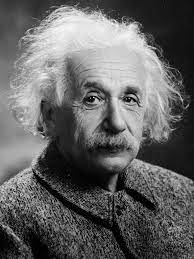

In [5]:
from PIL import Image
im = Image.open('/content/Einstein.jpg')
display(im);

In [6]:
predict_step(["/content/Einstein.jpg"])

['a man in a suit and tie posing for a picture']

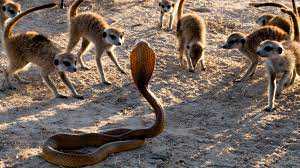

In [11]:
im = Image.open('/content/sneak.jpg')
display(im);

In [12]:
predict_step(["/content/sneak.jpg"])

['a herd of animals standing on top of a dirt field']

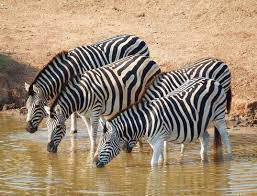

In [13]:
im = Image.open('/content/zebra.jpg')
display(im);

In [14]:
predict_step(["/content/zebra.jpg"])

['a herd of zebras drinking water from a pond']

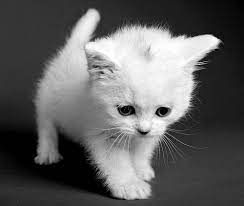

In [15]:
im = Image.open('/content/cat.jpg')
display(im);

In [16]:
predict_step(["/content/cat.jpg"])

['a white kitten sitting on top of a white surface']